### 8_Feature Engineering Assignment

1, You've constructed some potentially useful and business-relevant features, derived from summary statistics, for each of the states you're concerned with. You've explored many of these features in turn and found various trends. Some states are higher in some but not in others. Some features will also be more correlated with one another than others.
One way to disentangle this interconnected web of relationships is via principal components analysis (PCA). This technique will find linear combinations of the original features that are uncorrelated with one another and order them by the amount of variance they explain. You can use these derived features to visualize the data in a lower dimension (e.g. 2 down from 7) and know how much variance the representation explains. You can also explore how the original features contribute to these derived features.

The basic steps in this process are:

scale the data and verify the scaling
fit the PCA transformation (learn the transformation from the data)
Draw scree plot
Find the optimum number of components
Draw the biplot and interpret the relationship between features and components
Find the exact correlation between components and features using loading
Please use ski_resort_data

1- Scale the data

2- Verifying the scaling

3- Calculate the PCA transformation

4- Draw Scree Plot

5- Find the Optimum Number of Components

6- Draw Biplot

7- Calculate Loadings

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder 

pd.set_option('display.max_row', None, 'display.max_columns', None)


In [32]:
df = pd.read_csv('Datasets/ski_resort_data.csv')
df.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [33]:
df.nunique()*100/len(df)

Name                 99.696970
Region               11.515152
state                10.606061
summit_elev          80.606061
vertical_drop        58.484848
base_elev            73.939394
trams                 1.515152
fastEight             0.606061
fastSixes             2.121212
fastQuads             4.242424
quad                  2.121212
triple                2.727273
double                3.030303
surface               3.636364
total_chairs          9.393939
Runs                 33.333333
TerrainParks          3.333333
LongestRun_mi        12.727273
SkiableTerrain_ac    58.484848
Snow Making_ac       43.333333
daysOpenLastYear     33.636364
yearsOpen            21.818182
averageSnowfall      32.424242
AdultWeekday         25.151515
AdultWeekend         24.545455
projectedDaysOpen    27.272727
NightSkiing_ac       23.636364
dtype: float64

In [34]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Columns: 27 entries, Name to NightSkiing_ac
dtypes: float64(13), int64(11), object(3)
memory usage: 69.7+ KB


In [35]:
df.drop(['Name','state'], axis=1, inplace=True)

In [36]:
df.isna().sum()*100/len(df)

Region                0.000000
summit_elev           0.000000
vertical_drop         0.000000
base_elev             0.000000
trams                 0.000000
fastEight            50.303030
fastSixes             0.000000
fastQuads             0.000000
quad                  0.000000
triple                0.000000
double                0.000000
surface               0.000000
total_chairs          0.000000
Runs                  1.212121
TerrainParks         15.454545
LongestRun_mi         1.515152
SkiableTerrain_ac     0.909091
Snow Making_ac       13.939394
daysOpenLastYear     15.454545
yearsOpen             0.303030
averageSnowfall       4.242424
AdultWeekday         16.363636
AdultWeekend         15.454545
projectedDaysOpen    14.242424
NightSkiing_ac       43.333333
dtype: float64

In [38]:
df.fillna(df.median(), inplace=True)

/var/folders/3j/dhs8gmxj1wv7j6tk8_jzmv1c0000gn/T/ipykernel_78383/3604797450.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace=True)


In [39]:
df.isna().sum()*100/len(df)

Region               0.0
summit_elev          0.0
vertical_drop        0.0
base_elev            0.0
trams                0.0
fastEight            0.0
fastSixes            0.0
fastQuads            0.0
quad                 0.0
triple               0.0
double               0.0
surface              0.0
total_chairs         0.0
Runs                 0.0
TerrainParks         0.0
LongestRun_mi        0.0
SkiableTerrain_ac    0.0
Snow Making_ac       0.0
daysOpenLastYear     0.0
yearsOpen            0.0
averageSnowfall      0.0
AdultWeekday         0.0
AdultWeekend         0.0
projectedDaysOpen    0.0
NightSkiing_ac       0.0
dtype: float64

In [40]:
df.Region = df.Region.astype('category')

In [41]:
Region_dummies = pd.get_dummies(df.Region)


In [42]:
df = pd.concat([df, Region_dummies], axis=1)
df.columns

Index(['Region', 'summit_elev', 'vertical_drop', 'base_elev', 'trams',
       'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple', 'double',
       'surface', 'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen',
       'averageSnowfall', 'AdultWeekday', 'AdultWeekend', 'projectedDaysOpen',
       'NightSkiing_ac', 'Alaska', 'Arizona', 'Colorado', 'Connecticut',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Missouri', 'Montana',
       'Mt. Hood', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'Northern California', 'Ohio', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'Salt Lake City', 'Sierra Nevada',
       'South Dakota', 'Tennessee', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [45]:
df.head()

,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,Alaska,Arizona,Colorado,Connecticut,Idaho,Illinois,Indiana,Iowa,Maine,Maryland,Massachusetts,Michigan,Minnesota,Missouri,Montana,Mt. Hood,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,Northern California,Ohio,Oregon,Pennsylvania,Rhode Island,Salt Lake City,Sierra Nevada,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,3939,2500,250,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2600,1540,1200,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2090,294,1796,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,11500,2300,9200,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,72.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,11100,1800,9200,0,0.0,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
df.drop('Region', axis=1, inplace=True)


In [46]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Columns: 62 entries, summit_elev to Wyoming
dtypes: float64(13), int64(11), uint8(38)
memory usage: 74.2 KB


In [47]:
df.columns

Index(['summit_elev', 'vertical_drop', 'base_elev', 'trams', 'fastEight',
       'fastSixes', 'fastQuads', 'quad', 'triple', 'double', 'surface',
       'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen',
       'averageSnowfall', 'AdultWeekday', 'AdultWeekend', 'projectedDaysOpen',
       'NightSkiing_ac', 'Alaska', 'Arizona', 'Colorado', 'Connecticut',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Missouri', 'Montana',
       'Mt. Hood', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'Northern California', 'Ohio', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'Salt Lake City', 'Sierra Nevada',
       'South Dakota', 'Tennessee', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [48]:
from sklearn.preprocessing import normalize 
from sklearn.preprocessing import scale 
from scipy import stats 


In [52]:
df.head(3)

,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,Alaska,Arizona,Colorado,Connecticut,Idaho,Illinois,Indiana,Iowa,Maine,Maryland,Massachusetts,Michigan,Minnesota,Missouri,Montana,Mt. Hood,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,Northern California,Ohio,Oregon,Pennsylvania,Rhode Island,Salt Lake City,Sierra Nevada,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,3939,2500,250,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2600,1540,1200,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2090,294,1796,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
df_norm.head()

,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,Alaska,Arizona,Colorado,Connecticut,Idaho,Illinois,Indiana,Iowa,Maine,Maryland,Massachusetts,Michigan,Minnesota,Missouri,Montana,Mt. Hood,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,Northern California,Ohio,Oregon,Pennsylvania,Rhode Island,Salt Lake City,Sierra Nevada,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,0.036653,0.089338,0.002998,0.094072,0.0,0.000000,0.045502,0.068439,0.000000,0.000000,0.033045,0.038180,0.062880,0.033591,0.030073,0.045458,0.021177,0.069182,0.026151,0.162142,0.058168,0.069403,0.066899,0.254145,0.57735,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.024194,0.055032,0.014391,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.085416,0.000000,0.021817,0.029785,0.016795,0.060147,0.018070,0.011244,0.020755,0.019177,0.084828,0.042060,0.043275,0.040139,0.033270,0.57735,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.019448,0.010506,0.021538,0.000000,0.0,0.000000,0.000000,0.000000,0.024961,0.000000,0.033045,0.016363,0.010756,0.016795,0.030073,0.000847,0.005622,0.069182,0.015690,0.016723,0.026847,0.027761,0.067791,0.013862,0.57735,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.107011,0.082191,0.110329,0.000000,0.0,0.081379,0.000000,0.068439,0.049922,0.021354,0.033045,0.043634,0.045505,0.067182,0.060147,0.021938,0.019490,0.056268,0.035303,0.063015,0.079645,0.072669,0.054411,0.033270,0.00000,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.103289,0.064323,0.110329,0.000000,0.0,0.000000,0.022751,0.068439,0.074883,0.021354,0.000000,0.038180,0.053779,0.033591,0.036088,0.022588,0.014993,0.053040,0.021356,0.060591,0.066222,0.063688,0.046383,0.036967,0.00000,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
df_norm = df.copy(deep=True)

for col in df_norm.columns:
    df_norm[col] = normalize(
        np.array(df_norm[col]).reshape(1, -1)).reshape(-1, 1)
    print(col)
    print('Mininum={:.2f}'.format(df_norm[col].min()))
    print('Maximun={:.2f}'.format(df_norm[col].max()))
    
    print("*"*100)

summit_elev
Mininum=0.00
Maximun=0.13
****************************************************************************************************
vertical_drop
Mininum=0.00
Maximun=0.16
****************************************************************************************************
base_elev
Mininum=0.00
Maximun=0.13
****************************************************************************************************
trams
Mininum=0.00
Maximun=0.38
****************************************************************************************************
fastEight
Mininum=0.00
Maximun=1.00
****************************************************************************************************
fastSixes
Mininum=0.00
Maximun=0.49
****************************************************************************************************
fastQuads
Mininum=0.00
Maximun=0.34
****************************************************************************************************
quad
Mininum=0.00
Maximun=0.27
********

In [81]:
X=df_norm.values

In [82]:
X=StandardScaler().fit_transform(df_norm)
L = len(df_norm.columns)
pca=PCA(n_components=L)

principalComponents=pca.fit_transform(X)
principalComponents.shape

(330, 62)

In [59]:
print(principalComponents)

[[ 2.19103390e+00 -1.42456268e+00 -3.77139723e+00 ... -1.36246168e-01
   1.35929394e-16  3.17404639e-16]
 [-1.68368726e+00 -1.59195576e+00 -4.93203021e-01 ...  8.56266361e-02
   5.13494756e-16 -5.38162740e-16]
 [-2.25991985e+00 -8.85955494e-01 -8.17728934e-01 ...  5.07491987e-02
  -1.60012835e-15  1.80642440e-16]
 ...
 [-9.40311324e-02 -2.87835562e+00 -9.55358193e-03 ... -2.10745249e-02
  -1.12536377e-15  4.27911447e-17]
 [-3.61839799e-01 -3.07507581e+00  9.49242263e-01 ...  1.86174441e-02
   6.81866222e-16  7.56335662e-17]
 [-8.78128577e-01 -3.11069088e+00  8.85627015e-01 ... -1.32303058e-02
  -6.52754341e-16 -1.72712688e-16]]


In [63]:
pca.components_[2,:]

array([ 0.18992081,  0.0035659 ,  0.2298934 ,  0.06821503,  0.2597173 ,
        0.1920171 ,  0.02601124, -0.23112594,  0.02713185,  0.02617978,
        0.24303287,  0.09028281,  0.07543654, -0.02115204,  0.03822285,
        0.12430242,  0.03163644, -0.21302601, -0.0206574 , -0.08482762,
       -0.31389783, -0.35516448, -0.23922533, -0.21031182, -0.08255738,
       -0.01302895,  0.22861626,  0.01018311,  0.07448532,  0.07577059,
        0.04168769,  0.01269001, -0.05281758, -0.02709084,  0.01175516,
       -0.02374255, -0.00205087,  0.03235158,  0.24840287, -0.09038551,
        0.07617191, -0.15472033, -0.02944758,  0.10313542, -0.08101925,
        0.03912122,  0.035729  ,  0.0558791 ,  0.02699155, -0.01826933,
       -0.00317598, -0.09087216, -0.05780855,  0.06407458,  0.00062531,
       -0.0151877 , -0.18426228,  0.01646578, -0.12853665, -0.06104993,
        0.02220478,  0.05257608])

In [65]:
sum=0

for i in pca.components_[4,:]:
    sum += i**2
    
    
np.sqrt(sum)

1.0000000000000002

In [66]:
exp_var=pca.explained_variance_ratio_ 
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print('='*75)
print(cumsum_var)

[1.47902751e-01 4.94784495e-02 3.17015652e-02 2.80470666e-02
 2.44962193e-02 2.33100819e-02 2.20225958e-02 2.12342622e-02
 2.02018719e-02 1.96156054e-02 1.91369642e-02 1.81161674e-02
 1.76722748e-02 1.74257052e-02 1.73016417e-02 1.72063275e-02
 1.71017741e-02 1.69595757e-02 1.68419801e-02 1.67415126e-02
 1.66962482e-02 1.66478128e-02 1.65758348e-02 1.65036424e-02
 1.64845286e-02 1.64492599e-02 1.63869363e-02 1.63531647e-02
 1.63387142e-02 1.63363958e-02 1.63085160e-02 1.62599278e-02
 1.62478392e-02 1.62317884e-02 1.62218063e-02 1.62089938e-02
 1.62036357e-02 1.55186169e-02 1.43000780e-02 1.38936988e-02
 1.27317258e-02 1.26691707e-02 1.05623491e-02 9.81553723e-03
 9.35520923e-03 8.91530201e-03 8.52843923e-03 7.44201834e-03
 6.96666287e-03 5.73912339e-03 5.56990728e-03 4.30390131e-03
 3.61624438e-03 2.49862549e-03 2.40301852e-03 1.85558405e-03
 1.34973934e-03 6.24560640e-04 3.59314331e-04 1.17361055e-05
 2.91686745e-32 4.17573107e-34]
[14.79 19.74 22.91 25.71 28.16 30.49 32.69 34.81 36.8

Text(0, 0.5, '% of Variance Explained')

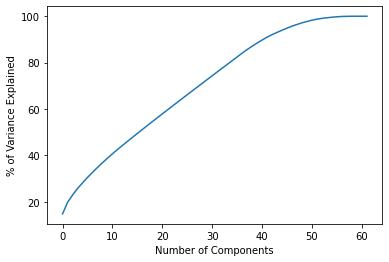

In [67]:
plt.plot(cumsum_var)
plt.xlabel('Number of Components')
plt.ylabel('% of Variance Explained')

In [ ]:
pd.DataFrame(principalComponents[:,:35])

In [73]:
pca.n_components

35

In [72]:
pca=PCA(n_components=35)
principalComponents=pca.fit_transform(X)
exp_var=pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print(cumsum_var)

[0.14790275 0.04947845 0.03170157 0.02804707 0.02449622 0.02331008
 0.0220226  0.02123426 0.02020187 0.01961561 0.01913696 0.01811617
 0.01767227 0.01742571 0.01730164 0.01720633 0.01710177 0.01695958
 0.01684198 0.01674151 0.01669625 0.01664781 0.01657583 0.01650364
 0.01648453 0.01644926 0.01638694 0.01635316 0.01633871 0.0163364
 0.01630852 0.01625993 0.01624784 0.01623179 0.01622181]
[14.79 19.74 22.91 25.71 28.16 30.49 32.69 34.81 36.83 38.79 40.7  42.51
 44.28 46.02 47.75 49.47 51.18 52.88 54.56 56.23 57.9  59.56 61.22 62.87
 64.52 66.16 67.8  69.44 71.07 72.7  74.33 75.96 77.58 79.2  80.82]


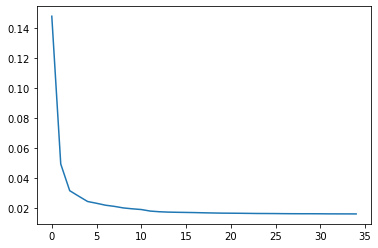

In [74]:
plt.plot(pca.explained_variance_ratio_)

In [86]:
pca.components_[0:2,:]

array([[ 2.41783352e-01,  2.92090598e-01,  2.04085017e-01,
         2.26754603e-01,  6.78035894e-02,  1.79174631e-01,
         2.61534994e-01,  8.84624448e-02,  1.37192293e-01,
         7.28529618e-02,  9.03468024e-02,  2.55045374e-01,
         2.95049140e-01,  1.68349674e-01,  2.54215964e-01,
         1.85275082e-01,  1.95597672e-01,  2.15493420e-01,
        -2.82638661e-03,  2.20637799e-01,  2.22842740e-01,
         2.17819209e-01,  1.95287922e-01,  5.62029225e-02,
        -6.10202136e-03,  1.57114141e-02,  1.45760392e-01,
        -3.16571439e-02,  1.51196582e-02, -3.82462710e-02,
        -2.11156323e-02, -3.11240893e-02, -1.94845861e-02,
        -3.13701672e-04, -3.79406010e-02, -6.30928884e-02,
        -4.61569001e-02, -2.41290214e-02,  3.23273937e-02,
         2.01633231e-02, -1.75092359e-02, -3.33665726e-03,
        -1.27463212e-02,  2.19352309e-02, -4.64728400e-02,
        -2.79564424e-02, -7.37601118e-03, -3.04997270e-02,
         9.47869690e-04, -4.79610442e-02, -1.94260108e-0

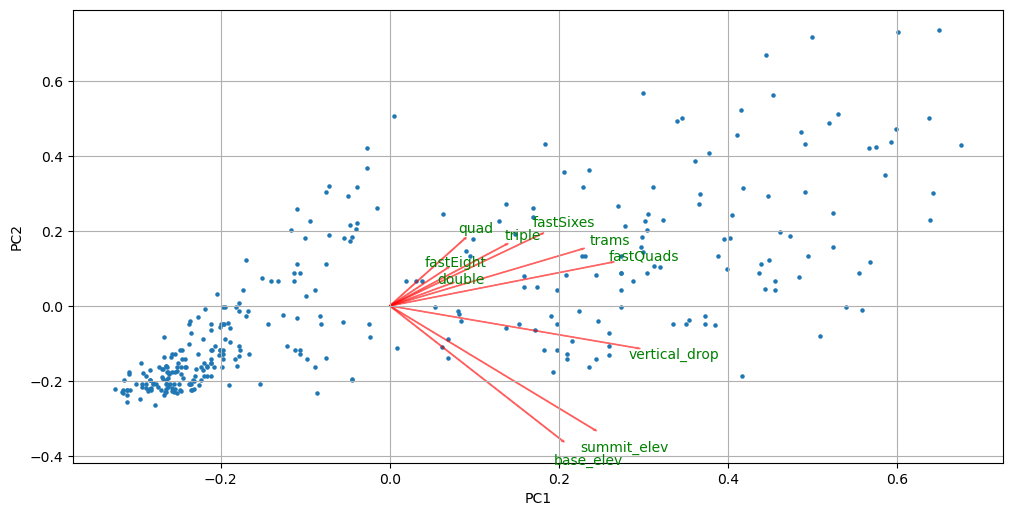

In [90]:
X=pd.DataFrame(X, columns=df.columns)

score=np.array(X)[:,0:2]
xs=score[:, 0]
ys=score[:, 1]

coeff = np.transpose(pca.components_[0:2,:])
# n = coeff.shape[0]
n = 10
scalex=1.0/(xs.max()-xs.min())
scaley=1.0/(ys.max()-ys.min())
fig=plt.figure(figsize=(12,6), dpi=100)
plt.scatter(xs * scalex, ys * scaley, s=5)

labels = list(X.columns)
for i in range(n):
    plt.arrow(0,0,coeff[i,0], coeff[i,1], color='r', alpha=0.5)
    if labels is None:
        plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, 'Var'+str(i+1), color='green', ha='center', va='center')
    else:
        plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color='g', ha='center', va='center')

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

In [91]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_) 

loading_matrix = pd.DataFrame(loadings[0:8,0:8], columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'],
                              index=df.columns[0:8])
loading_matrix


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
summit_elev,0.733279,-0.578962,0.266666,-0.048172,0.003088,0.122728,-0.094180,-0.009770
vertical_drop,0.885851,-0.197238,0.005007,-0.011527,0.085457,-0.171250,0.118698,-0.078082
base_elev,0.618948,-0.630962,0.322791,-0.047592,-0.024607,0.203076,-0.143616,0.007045
trams,0.687700,0.265441,0.095780,-0.217866,-0.039641,-0.195173,-0.030364,0.074039
fastEight,0.205634,0.176275,0.364667,0.202965,0.320819,-0.021378,0.366584,-0.134462
fastSixes,0.543400,0.336446,0.269609,-0.057396,-0.083434,-0.107923,-0.096416,0.076089
fastQuads,0.793182,0.203291,0.036522,-0.104033,-0.097765,-0.136609,-0.079294,0.103531
quad,0.268288,0.314008,-0.324522,-0.105263,0.263627,0.012597,0.069276,0.179076
